In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder 
from sklearn.compose import ColumnTransformer 


In [6]:
dfs=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day29-sklearn-pipelines/train.csv",usecols=['Ticket','Cabin','Survived'])

In [7]:
dfs

,Survived,Ticket,Cabin
0,0,A/5 21171,NaN
1,1,PC 17599,C85
2,1,STON/O2. 3101282,NaN
3,1,113803,C123
4,0,373450,NaN
...,...,...,...
886,0,211536,NaN
887,1,112053,B42
888,0,W./C. 6607,NaN
889,1,111369,C148


In [8]:
dfs.isnull().sum()

Survived      0
Ticket        0
Cabin       687
dtype: int64

In [9]:
dfs['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
# str.extract('(\d+)')
dfs['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [13]:
dfs['cabin_num']=dfs['Cabin'].str.extract('(\d+)')  # to extract the  numerical part 
dfs['ticket_num']=dfs['Ticket'].str.extract('(\d+)')


In [23]:
dfs['Ticket'].str.extract('(\d+)')[0] # to capture the first letter 

0           5
1       17599
2           2
3      113803
4      373450
        ...  
886    211536
887    112053
888      6607
889    111369
890    370376
Name: 0, Length: 891, dtype: object

<Axes: >

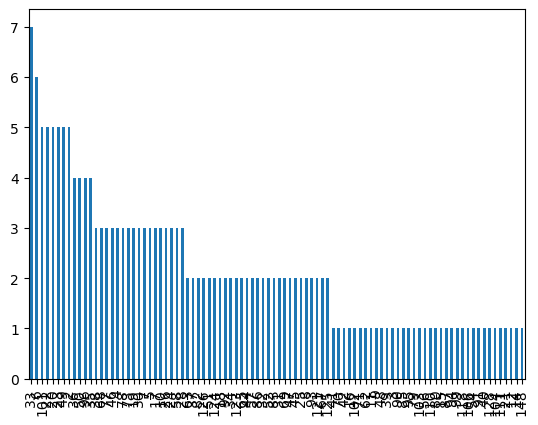

In [21]:
dfs['Cabin'].str.extract('(\d+)')[0].value_counts().plot(kind='bar')

In [24]:
dfs['cabin_cat']=dfs['Cabin'].str.extract('(\d)')[0] # here capturing numerical and nan value 

<Axes: >

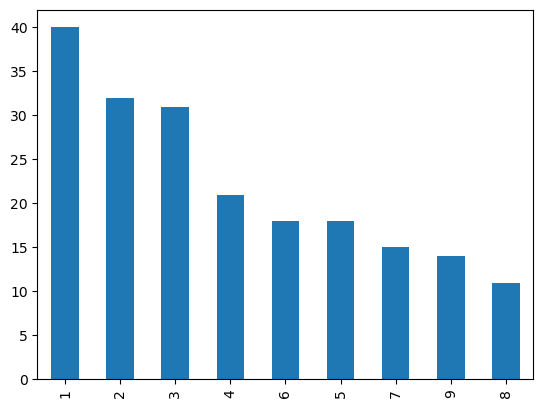

In [28]:
dfs['cabin_cat'].value_counts().plot(kind='bar') # now you can visualize the values 

In [34]:
dfs['ticket_number']=dfs['Ticket'].apply(lambda s:s.split()[-1])
dfs['ticket_categories']=dfs['Ticket'].apply(lambda s:s.split()[0])



In [35]:
dfs

,Survived,Ticket,Cabin,cabin_num,ticket_num,cabin_cat,ticket_number,ticket_categories
0,0,A/5 21171,NaN,NaN,5,NaN,21171,A/5
1,1,PC 17599,C85,85,17599,8,17599,PC
2,1,STON/O2. 3101282,NaN,NaN,2,NaN,3101282,STON/O2.
3,1,113803,C123,123,113803,1,113803,113803
4,0,373450,NaN,NaN,373450,NaN,373450,373450
...,...,...,...,...,...,...,...,...
886,0,211536,NaN,NaN,211536,NaN,211536,211536
887,1,112053,B42,42,112053,4,112053,112053
888,0,W./C. 6607,NaN,NaN,6607,NaN,6607,W./C.
889,1,111369,C148,148,111369,1,111369,111369


In [39]:
#map it to the ineteger number 
dfs['ticket_number'] = pd.to_numeric(dfs['ticket_number'],
                                   errors='coerce',
                                   downcast='integer')
# here i am mapping the number to nan values
dfs['ticket_categories'] = np.where(dfs['ticket_categories'].str.isdigit(), np.nan,
                              dfs['ticket_categories'])



In [38]:
dfs

,Survived,Ticket,Cabin,cabin_num,ticket_num,cabin_cat,ticket_number,ticket_categories
0,0,A/5 21171,NaN,NaN,5,NaN,21171.0,A/5
1,1,PC 17599,C85,85,17599,8,17599.0,PC
2,1,STON/O2. 3101282,NaN,NaN,2,NaN,3101282.0,STON/O2.
3,1,113803,C123,123,113803,1,113803.0,NaN
4,0,373450,NaN,NaN,373450,NaN,373450.0,NaN
...,...,...,...,...,...,...,...,...
886,0,211536,NaN,NaN,211536,NaN,211536.0,NaN
887,1,112053,B42,42,112053,4,112053.0,NaN
888,0,W./C. 6607,NaN,NaN,6607,NaN,6607.0,W./C.
889,1,111369,C148,148,111369,1,111369.0,NaN
